# Assignment 4
Implementare una rete neurale per la classificazione del dataset MNIST a partire dalle istruzioni viste ad esercitazione.

Seguire la seguente struttura:

- Convoluzione bidimensionale con 32 filtri 3×3
- ReLU
- Max pooling bidimensionale con filtro 2×2
- Flattening
- Fully-connected che mappi a 128 dimensioni
- ReLU
- Fully-connected che mappi alla dimensione finale del problema

## Import librerie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

Using TensorFlow backend.


## Import del dataset MNIST

In [2]:
# import mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape[0], 'dati di training')
print(x_test.shape[0], 'dati di test')
print('dimensione dei dati: ', x_train.shape)

60000 dati di training
10000 dati di test
dimensione dei dati:  (60000, 28, 28)


Esempio di immagine contenuta nel dataset

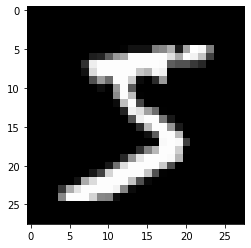

In [4]:
plt.imshow(x_train[0], cmap = 'gray')

Aggiunta della dimensione del canale alle immagini

In [5]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape

(60000, 28, 28, 1)

Conversione del tipo delle immagini in float e normalizzazione dividendo per 255.0

In [6]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

Conversione in forma categorica delle classi da predire

In [7]:
classes = 10
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

## Creazione del modello richiesto

In [8]:
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])

model = Sequential()
model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = input_shape
                 ))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(classes, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


Compilazione del modello.

Come loss viene utilizzata la categorical crossentropy in quanto le classi in output sono variabili categoriche.
Come ottimizzatore è stato utilizzato adam.

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

Il modello è stato addestrato con batch size 128 e per sole due epoche.

Come dati di validation è stato utilizzato il 20% del train set.


In [11]:
h = model.fit(x_train, y_train,
              batch_size=128,
              epochs=2,
              verbose=1,
              validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 22s 457us/step - loss: 0.2590 - accuracy: 0.9269 - val_loss: 0.1013 - val_accuracy: 0.9706
Epoch 2/2
48000/48000 [==============================] - 20s 407us/step - loss: 0.0773 - accuracy: 0.9772 - val_loss: 0.0690 - val_accuracy: 0.9800


Grafico dell'addestramento del modello

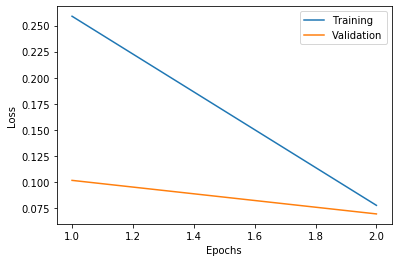

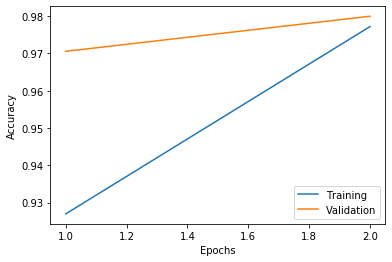

In [12]:
xplot = list(range(1,h.epoch[-1]+2))

def plot_h(net_h):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(xplot, net_h.history['loss'])
    plt.plot(xplot, net_h.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(xplot, net_h.history['accuracy'])
    plt.plot(xplot, net_h.history['val_accuracy'])
    plt.legend(['Training', 'Validation'])

    
plot_h(h)

Valutazione del modello sue test set

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.059604592344909904
Test accuracy: 0.9793000221252441


Nonostante le sole due epoche del modello, quest'ultimo raggiunge un'accuracy del 98% sul test set con una lo pari a 0.06.